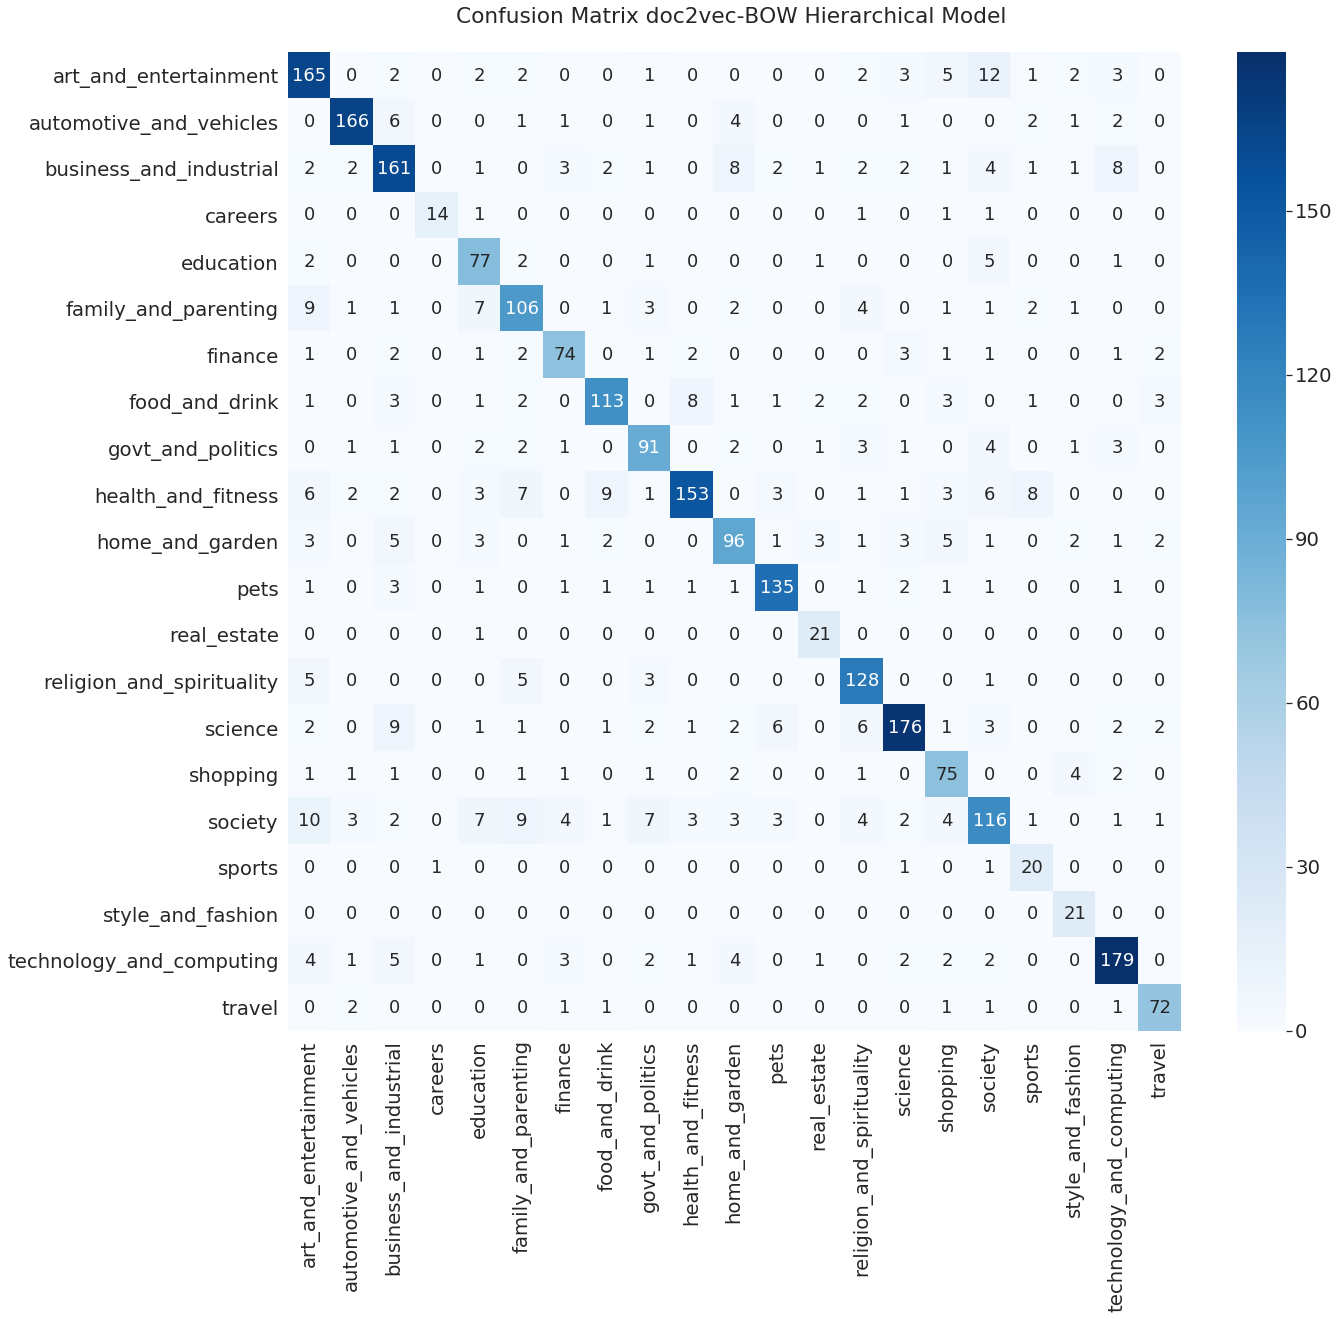

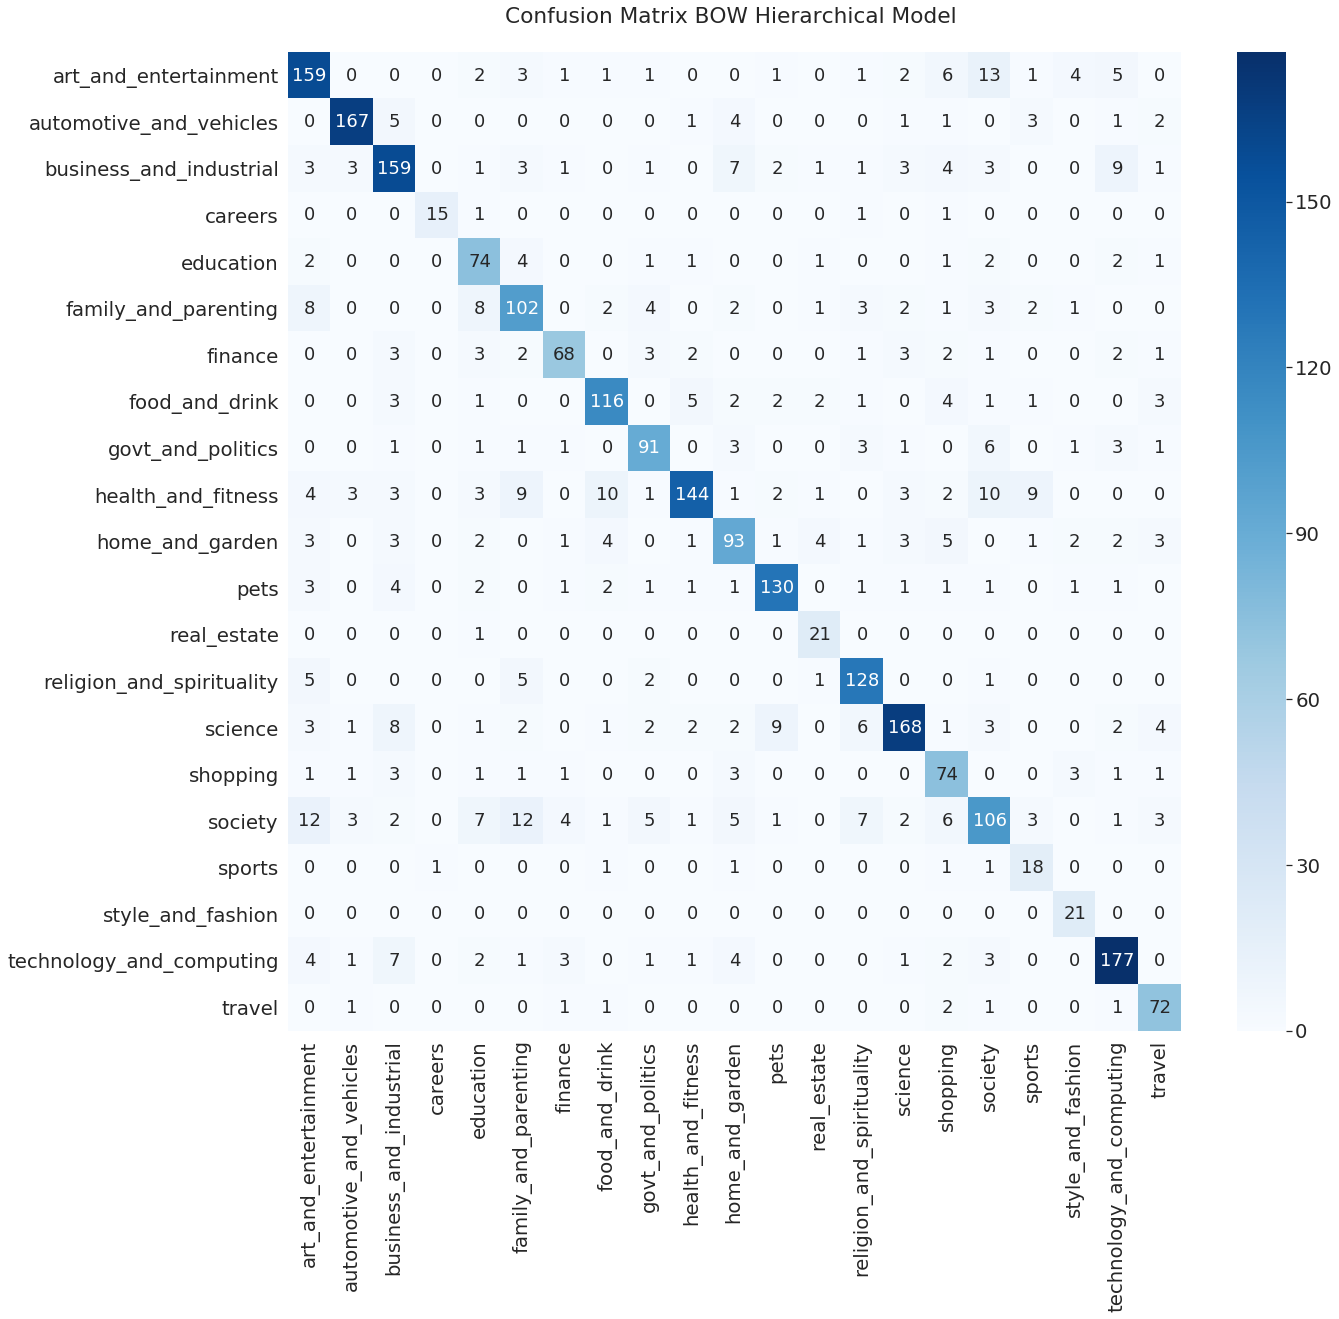

In [73]:
import json
from sklearn import preprocessing
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd

for kind in ["doc2vec-BOW","BOW"]:

    dataset = pd.read_csv("confusionMatrix_"+kind+".csv").drop("Unnamed: 0",axis=1)

    y_pred = list(dataset["predicted"])
    y_true = list(dataset["expected"])
    class_names = set(y_true)

    np.set_printoptions(precision=2)    


    le = preprocessing.LabelEncoder()
    le.fit(y_pred)

    y_pred = le.transform(y_pred)
    y_true = le.transform(y_true)


    categories = json.load(open("../categories.json"))


    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm,index = categories["root"], columns = categories["root"])
    plt.figure(figsize = (20,18))
    plt.tight_layout()
    sn.set(font_scale=1.8)
    ax = sn.heatmap(df_cm,cmap="Blues",annot=True,annot_kws={"size": 18},fmt='g')
    ax.set_ylim(21,0)
    plt.title("Confusion Matrix "+kind+" Hierarchical Model \n")
    plt.savefig("confusion_matrix_"+kind+".pdf",bbox_inches='tight')
    plt.show()
